In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings

In [63]:
df=pd.read_csv('abc.csv')

In [64]:
df.shape

(193, 1231)

In [65]:
warnings.filterwarnings("ignore")
encoder = LabelEncoder()
df=pd.read_csv('abc.csv')
df.sample(frac=0.1)

,centreid,HOUSEID,PARTICID,houseid2,countryid,region,rural,DATE,INTERID,age,...,Nparks,parkinsonism,walkdiff,vuln_inc,vuln_live1,chilocal,relweekly,frweekly,popvar,Statusfu
33,12,1202,1,1201202,8,3,0,09/25/2004,3,86,...,3,0,0,3,1,1,1,1,1,1
168,12,1866,1,1201866,8,3,0,02/07/2006,8,67,...,2,0,0,4,1,1,0,0,1,4
60,12,1438,1,1201438,8,3,0,03/21/2005,3,70,...,1,0,0,3,1,1,1,1,1,9
118,12,1763,1,1201763,8,3,0,12/14/2005,8,70,...,1,0,0,2,1,1,1,0,1,1
179,12,1913,1,1201913,8,3,0,02/16/2006,5,70,...,2,0,0,2,1,1,1,1,1,3
6,12,1060,1,1201060,8,3,0,02/20/2004,1,65,...,1,0,0,3,1,1,1,1,1,3
155,12,1849,1,1201849,8,3,0,02/18/2006,8,66,...,1,0,0,2,1,1,0,0,1,3
114,12,1743,1,1201743,8,3,0,12/28/2005,8,68,...,1,0,0,3,3,0,,0,1,3
152,12,1842,1,1201842,8,3,0,12/28/2005,5,66,...,2,0,0,2,1,1,1,1,1,3
128,12,1788,1,1201788,8,3,0,01/03/2006,8,68,...,1,0,0,2,1,1,1,0,1,3


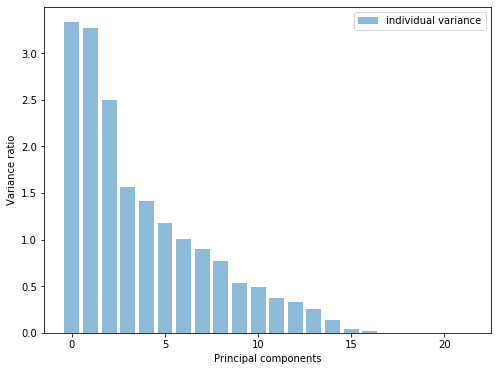

In [66]:


for col in df.columns:
    df[col] = encoder.fit_transform(df[col])

X_features =df.iloc[:,1:23]
y_label = df.iloc[:, 0]
scaler = StandardScaler()
X_features = scaler.fit_transform(X_features)
pca = PCA()
pca.fit_transform(X_features)
pca_variance = pca.explained_variance_

plt.figure(figsize=(8, 6))
plt.bar(range(22), pca_variance, alpha=0.5, align='center', label='individual variance')
plt.legend()
plt.ylabel('Variance ratio')
plt.xlabel('Principal components')
plt.show()



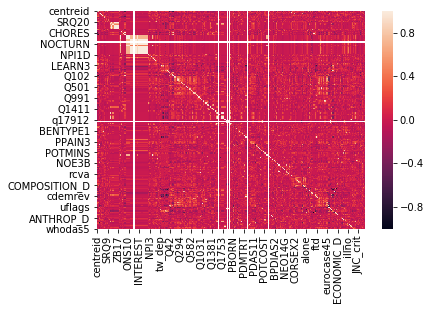

In [67]:
corr = df.corr()
sns.heatmap(corr)

In [68]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j]< 0.99 or corr.iloc[i,j]==1:
            if columns[j]:
                columns[j] = False
selected_columns = df.columns[columns]
df = df[selected_columns]

In [69]:
df.head()

,centreid,HOUSEID,countryid,region,rural,INFORMANT_M,HELPJOB,ORIENT,LOSTIN,CHORES,...,deaf_select2,FRAILTY_D,DISABILITY_D,DEPENDENCE_D,paid_carer,CVRF_D,aware_prop,control_prop,overall_prop,popvar
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
selected_columns

Index(['centreid', 'HOUSEID', 'countryid', 'region', 'rural', 'INFORMANT_M',
       'HELPJOB', 'ORIENT', 'LOSTIN', 'CHORES',
       ...
       'deaf_select2', 'FRAILTY_D', 'DISABILITY_D', 'DEPENDENCE_D',
       'paid_carer', 'CVRF_D', 'aware_prop', 'control_prop', 'overall_prop',
       'popvar'],
      dtype='object', length=198)